<div class="alert alert-warning"></i><strong>CFT Data Science With R Tutorials</strong><br>By: Seiya David 
 </div>

# Regression Models

### 1.0 What is Data Science

Data science is an interdisciplinary field about scientific methods, processes, and systems to extract insights from raw data 
in various forms, either structured or unstructured and asking questions (formulating hypothesis), answers to which solve known 
problems or unearth unknown solutions that in turn drive business value.<br>
![image](ds.png)
As you make progress in the field of Data Science,Machine Learning would seems to be synemenous with data science but as shown in the chart above, data science is a collection of several interdisciplinary fields, so let us look at what Machine learning is

#### 1.1 Machine learning
Machine learning, at its core, is concerned with the algorithms that transform information into actionable intelligence or one could see Machine learning is as a field of computer science that gives computers the ability to learn without being explicitly programmed. 
As you have rightly observed, there is no one definistion of what whachine learning simply means.

#### 1.2 Steps in Machine Learning
There are four to five steps involved in machine learning depending on how you sub classify some of the steps. Here we will look at four such processes which are listed as follows:
* Data Pre-processing
* Algorithm Selection
* Model Diagnostics/Tuning
* Evaluation of Result

> #### 1.2.1 Data Pre-processing<BR>
 Data preparation is the most important step for all machine learning algorithms and it takes an average of 70% of total time spent in model building. 
 If data is not prcessed right (ie, such as missing data, poorly formated data) even the most advanced algorithms would give a    very misleading or poor model which in turn could cost a business if taken to production.
 ##### Below shows what dataset rows and columns are called in the machine learning world
![](features.png) 

> #### 1.2.2 Algorithm Selection
There are basicly three categories of machine learning algorithms. These are 
* Supervised Machine learning Algorithms
> These types of algoritms imply using the patterns in a dataset to make predictions. To make this point clearer, let us assume that we have a data set which has the quantity of food consumed and the weight of five childern and let us also assume that we intend to predict the weight of a child who consumed 120 ml of food.what a supervised algorithm would do is to find the logic/pattern behind the dataset and come up with an estimate for the weight of the child.In this very simple example the 
'food consumed' feature/variable is said to be INDEPENDENT VARIABLE, while the weight variable is called DEPENDENT VARIABLE.

|food consumed (ml) | weight (kg)   |
| ----------------- |:-------------:|
| 360               | 20.1          |   
| 900               | 35.3          |
| 760               | 26.5          |
| 120               | 9.0           |
| 400               | 22.0          |

>It is very import to know that Supervised Machine Learning algoriths are sub divided into two categories. REGRESSION and CLASSIFICATION.
***REGRESSION:*** Simply put, when one is tasked to predict a continous value, such a task is a Regression task. The example give above is a typical regression task. The accuracy of a Regression model is measured by the values of RMSE or Adjusted R-squared or MSE<br><br>
***CLASSIFICATION:*** When the task is to predict a categorical value (i.e, whether it rain or not) such task is said to be a Classification task.The accuracy of a Classification model is measured by what is called CONFUSION MATRIX.



> * UnSupervised Machine learning Algorithms:<br>
>> These type of algorithms answers quations like what patterns exists in my dataset

> * Reinforcement Learning:<br>
>> Reinforcement Learning algorithms explicitly makes prediction and improve the predictions as more results comes in.
This is the idea behind self driving cars.

The type of algorithm you chose should be determinded by the nature of the problem you wish to solve.
### 1.0 Assignment
List as many machine learning algorithms you know and classify them as supervised, unsupervised and reinforcement as well as list which of the supervised models are regression and classification, and which are both. 

> #### 1.2.3 Model Diagnostics/Tuning
After the model has been fitted on our dataset (training dataset),We analyze the initial output to ensure the model does not violet some standard assumtions, like in the case of linear regression or that the model does not UNDERFIT or OVERFIT. If the initial model does not perform optimally, we would look to tune it's parameters (hyper-parameter tuning)

> #### 1.2.4 Evaluation of Result
After we are satisfied with the above step we can now use the model to predict future data.

### 2.0 Simple/Univariate Linear Regression

We begin by looking at a simple way to predict a quantitative response, y, with one predictor variable, x, 
assuming that y has a linear relationship with x. 
Mathematically linear model can be expressed as, ![](linear.png)<br>
where, <br>***y*** is the Dependent variable (i.e, what we intend to predict)<br>***b0*** is a constant (i.e, a number)<br>***b1*** is the slope and ***x*** is the Independent variable

In [ ]:
#Please at this point if you had not, install these R packages. It will be best to do so.
#These will be required for our demonstartion today.

install.packages("alr3")
install.packages("corrplot")
install.packages("leaps")

#### Problem statement
We have been tasked to predict the water yeild of the snake River waterhed in Wyoming USA given the water contents of the years 
snowfall.<br>
For this task, the required data can be found in the 'alr3' package<br>
'alr' means Applied Linear Regression

#### Now, let's get our hands dirty with some codes

In [2]:
library(alr3)      # Load the data library with the required data
library(corrplot)  # This package will be required for plotting a correlation plot
library(leaps)     # required for variate/ feature selection

data(snake)        # Load the data
attach(snake)      # Attach the data

Warning message:
"package 'alr3' was built under R version 3.5.2"Loading required package: car
Warning message:
"package 'car' was built under R version 3.5.2"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded
Warning message:
"package 'leaps' was built under R version 3.5.2"

In [21]:
# data has 17 observations and 2 features
dim(snake)         # View the dimension of the data, 

[1] 17  2

In [24]:
head(snake)   # View the first few rows of the data, by default this will show just the first 
                # six rows/ observations

,X,Y
12,25.1,12.9
13,12.4,8.8
14,35.1,17.4
15,31.5,14.9
16,21.1,10.5
17,27.6,16.1


In [27]:
# We see that our features variables names (X and Y) does not make much sence,
# let's give it meaningful names
names(snake)<- c("content","yield")
head(snake,8)  # View the first eight records
               # Did you just asked why I named the features 'content' and 'yield'?
               # type help(snake) to get the answers

content,yield
23.1,10.5
32.8,16.7
31.8,18.2
32.0,17.0
30.4,16.3
24.0,10.5
39.5,23.1
24.2,12.4


#### Data Pre-processing

In [28]:
str(snake) # The syntax (str: structure gives the data format of the dataset

'data.frame':	17 obs. of  2 variables:
 $ content: num  23.1 32.8 31.8 32 30.4 24 39.5 24.2 52.5 37.9 ...
 $ yield  : num  10.5 16.7 18.2 17 16.3 10.5 23.1 12.4 24.9 22.8 ...


In [6]:
summary(snake) # This syntax would show a summary of the dataset

    content          yield      
 Min.   :12.40   Min.   : 8.80  
 1st Qu.:24.20   1st Qu.:12.40  
 Median :30.50   Median :16.10  
 Mean   :30.09   Mean   :15.71  
 3rd Qu.:32.80   3rd Qu.:17.40  
 Max.   :52.50   Max.   :24.90  

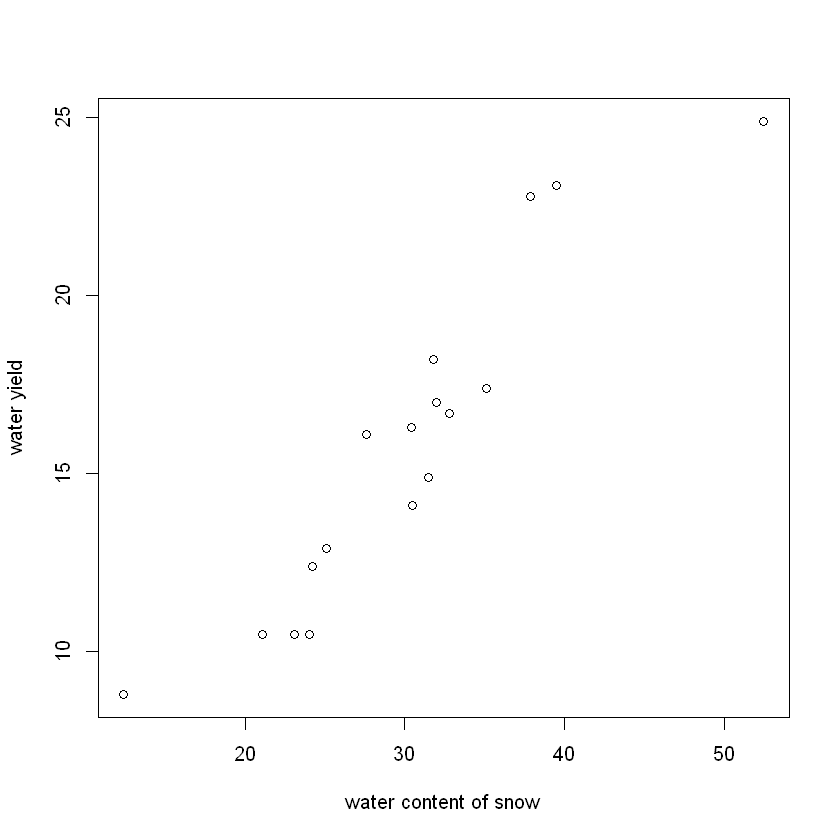

In [29]:
attach(snake) # Attach the new renamed data

# Let's plot the data
plot(content, yield, xlab = "water content of snow", ylab = "water yield") 
# xlab is what information you wish to state on the x axis
# ylab is what information you wish to state on the y axis

> The plot above does show signs of linear relationship between 'content' and 'yield', if this was not the case, applying log on the independent variable would have been an option.
To perform a linear regression in R, we use the lm() function to create a model. The the standard form of which is given below<br> 
fit <-  lm(Y ~ X)<br>
where fit is the object that holds the result.<br>
Y is the Dependent variable.<br>
X is the Independent variable.

#### Algorithm Selection
Considering out what we aim to acheive (predicting a continuos value) we select Linear regression model,

In [34]:
# build a linear model
water.yield <- lm(yield ~ content)

#### Model Diagnostics/Tuning

In [35]:
# How good is this model? To answer this question, we use the 'summary()' function 
# and pass in the model object(i.e water.yield) 
# as argument.This function will output model specification, descriptive statistics 
# about the residuals, the coefficients, 
# codes to model significance, and a summary on model error and fit
summary(water.yield)


Call:
lm(formula = yield ~ content)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1793 -1.5149 -0.3624  1.6276  3.1973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.72538    1.54882   0.468    0.646    
content      0.49808    0.04952  10.058 4.63e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.743 on 15 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8623 
F-statistic: 101.2 on 1 and 15 DF,  p-value: 4.632e-08


###### What are all these outputs, let's examine each section:

![](call.png) 

> The above section simply states the linear regression syntax or code that was run earlier

![](residual.png) 

> These values states the residual/error summary of the fitted linear regression model

![](coef.png)

> Let us examine the parameter estimates, the model tells us that the yield is equal to ***0.72538*** plus ***0.49808*** times the ***content***. It can be stated that for every one unit change in the content, the yield will increase by 0.49808 units<br>
Do you still remember the formular ***y = b0 + b1x1***?<br>
***yield = 0.72538 + 0.49808 x content***

![](multR.png)

> Multiple R-squared:<br>
Here we see that R-squared is 0.8709, and can range between 0 and 1 this value is a measure of the strength of the association between content and yield. The interpretation in this case is that 87 (0.8709 * 100) percent of the variation in the water yield can be explained by the water content of snow OR how close the data are to the fitted line. The higher the value of R Squared the better better. The draw back of using R-squared is that when more variables are added to the model, the value of R Squared __INCREASES__<br>
 
> The best value to consider for model efficieny is the Adjusted R-squared. This is beacuse it penelizes models high number of predictors. Again the higher the value the better.

> On this section, we will focus on the last two rows output.
The F-statistic is used to test the null hypothesis that:<br>
***$H_0$: Model coefficients are all zero***<br>
***$H_1$: Model coefficients are NOT all zero***<br>
Since the p-value is highly significant (i.e, p value = 0.000000004632 is less than 0.05), we can reject the null(i.e, H0) and accept H1.

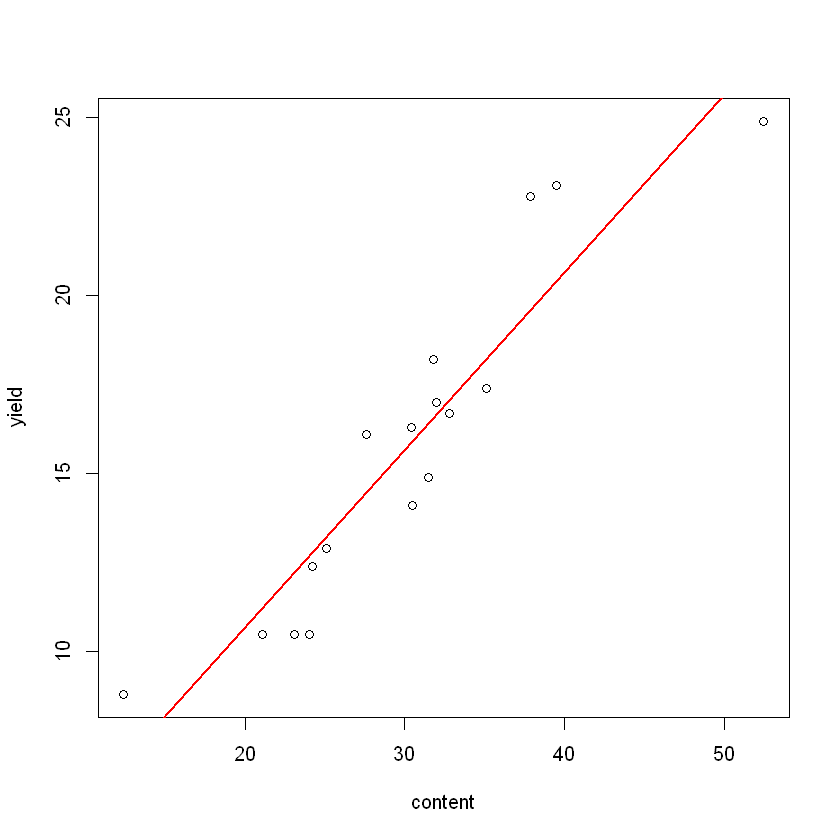

In [36]:
# Plot the raw data with the fitted model
plot(content, yield)

# This inserts the fitted model to the plot
abline(water.yield, lwd=2, col="red", main="scatterplot merged with Best fit line") 

### Linear Regression Model Assumptions

> **Homoscedasticity:** 
plot 1 red line should not increses or decrease with the fitted line, the mean of the residuals should be zero and flat, if it 
increases or decreses with the fitted value that Heteroscedacity.<br>
If p > 0.05 No heteroscedasticity<br>
lmtest::bptest(good.fit)

> **Linearity:**
If on plotting, linear relationship between the Independent and Dependent variables are not obvious, we would need to transform X or Y or better still use another technique.

> Ensure the **residuals are uncorrelation**
 
> Ensure **no Multi-collinearity:**
The predictors variables are linearly independent of each other
No linear relationship should exist between two predictor variables as this can lead to biased estimates
vif(fit)

> **Normality of residuals**<br>
shapiro.test()<br>
If the p-value > 0.05 it implying that the distribution of the data are not significantly different from normal distribution.
In other words, we can assume the normality.<br>

> **No Presence of outliers**<br>
car::influenceIndexPlot(good.fit, id.n = 5)<br>
Points that are 4 times the mean are called outliers

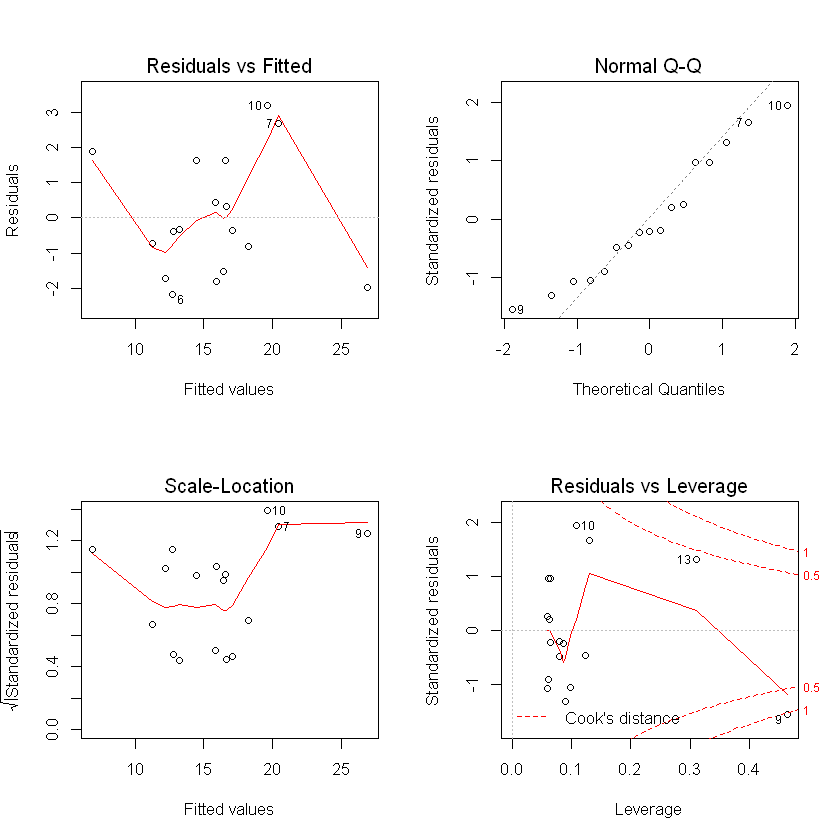

In [41]:
# Model diagnostics
par(mfrow=c(2,2)) # Lets plot a two by two grid charts
plot(water.yield) # Plot the diagnostics
                  # To be explained in class

> The two plots on the left allow us to examine the homoscedasticity of errors and non-linearity. What we are looking for is some type of pattern or, more importantly, that no pattern exists. 
Given the sample size of only 17 observations, nothing obvious can be seen. Common heteroscedastic errors will appear to be u-shaped, inverted u-shaped, or clustered close together on the left of the plot. 
They will become wider as the fitted values increase (a funnel shape). It is safe to conclude that no violation of homoscedasticity is apparent in our model.

> The Normal Q-Q plot in the upper-right corner helps us to determine if the residuals are normally distributed.The Quantile-Quantile (Q-Q) represents the quantile values of one variable plotted against the quantile values of another. It appears that the outliers (observations 7, 9, and 10), may be causing a violation of the assumption. The Residuals vs Leverage plot can tell us what observations, if any, are unduly influencing the model; in other words, if there are any outliers we should be concerned about. The statistic is Cook's distance or Cook's D, and it is generally accepted that a value greater than 1 should be worthy of further inspection.

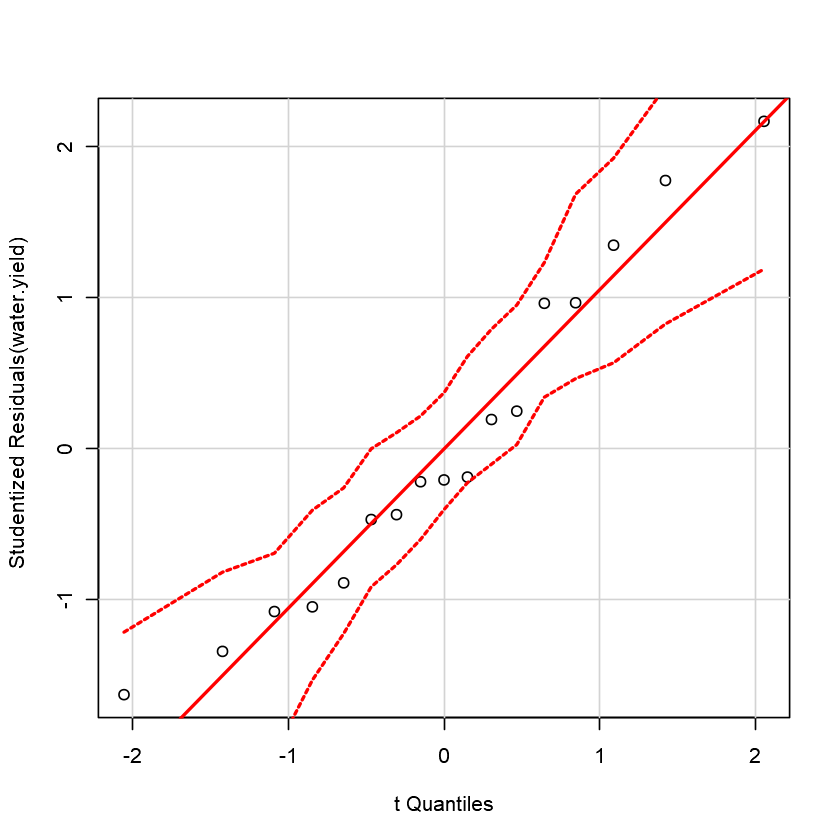

In [10]:
# Since we have concerns around QQ plot, we run the code below.
qqPlot(water.yield)
# From the output all points falls within the boundary, so our model is all good

#### Evaluation of Result

In [42]:
new_data<- data.frame(content=c(21.3, 56.1, 18.3)) # Create a sample data to test our model
new_data

content
21.3
56.1
18.3


In [43]:
predict(water.yield,new_data)

1         2         3 
11.334510 28.667736  9.840266

In [47]:
# Let us attach our fitted values to the original dataset and compare
snake$fit<- fitted(water.yield)

snake$residuals <- snake$yield - snake$fit
snake  # What do you think of the output?

content,yield,fit,residuals
23.1,10.5,12.231056,-1.7310561
32.8,16.7,17.062444,-0.3624437
31.8,18.2,16.564363,1.6356375
32.0,17.0,16.663979,0.3360212
30.4,16.3,15.867049,0.4329512
24.0,10.5,12.679329,-2.1793292
39.5,23.1,20.399588,2.7004123
24.2,12.4,12.778945,-0.3789454
52.5,24.9,26.874643,-1.9746433
37.9,22.8,19.602658,3.1973422


### 3.0 Multiple Linear Regression

#### Data Pre-processing
Algorithm Selection
Model Diagnostics/Tuning
Evaluation of Result

> Do you still remember what the main difference is between a simple linear regression and a multiple linear regression?

> Lets say we have been tasked to predict water availability in the state of California. 

In [50]:
help(water)

In [4]:
# Lets load the dataset from the alr3 packages. Ensure this packages is installed and loaded
data(water)
attach(water)
write.csv(water, 'water.csv')
# The regressand for this project is BSAAM

The following objects are masked from water (pos = 3):

    APMAM, APSAB, APSLAKE, BSAAM, OPBPC, OPRC, OPSLAKE, Year



In [56]:
# Let's look at the first few rows of the data
head(water)

Year,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
1948,9.13,3.58,3.91,4.10,7.43,6.47,54235
1949,5.28,4.82,5.20,7.55,11.11,10.26,67567
1950,4.20,3.77,3.67,9.52,12.20,11.35,66161
1951,4.60,4.46,3.93,11.14,15.15,11.13,68094
1952,7.15,4.99,4.88,16.34,20.05,22.81,107080
1953,9.70,5.65,4.91,8.88,8.15,7.41,67594


In [57]:
# From the output above, it's observed that the first column holds a data value, 
# this is not required for regression problems
# let's remove this field with the syntax below and store it in the object 'calif.water'
calif.water <- water[, -1]

In [58]:
# Let's view our data again to ensure the data field has been removed
head(calif.water)

APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
9.13,3.58,3.91,4.10,7.43,6.47,54235
5.28,4.82,5.20,7.55,11.11,10.26,67567
4.20,3.77,3.67,9.52,12.20,11.35,66161
4.60,4.46,3.93,11.14,15.15,11.13,68094
7.15,4.99,4.88,16.34,20.05,22.81,107080
9.70,5.65,4.91,8.88,8.15,7.41,67594


In [18]:
# What does the field headers mean?
help(water) # This should answer your question

In [18]:
# Let us convert our data to a correlation matrix
calif.cor <- cor(calif.water)
calif.cor # View the output

,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
APMAM,1.0000000,0.82768637,0.81607595,0.12238567,0.1544155,0.10754212,0.2385695
APSAB,0.8276864,1.00000000,0.90030474,0.03954211,0.1056396,0.02961175,0.1832950
APSLAKE,0.8160760,0.90030474,1.00000000,0.09344773,0.1063836,0.10058669,0.2493409
OPBPC,0.1223857,0.03954211,0.09344773,1.00000000,0.8647073,0.94334741,0.8857478
OPRC,0.1544155,0.10563959,0.10638359,0.86470733,1.0000000,0.91914467,0.9196270
OPSLAKE,0.1075421,0.02961175,0.10058669,0.94334741,0.9191447,1.00000000,0.9384360
BSAAM,0.2385695,0.18329499,0.24934094,0.88574778,0.9196270,0.93843604,1.0000000


In [19]:
help(water)

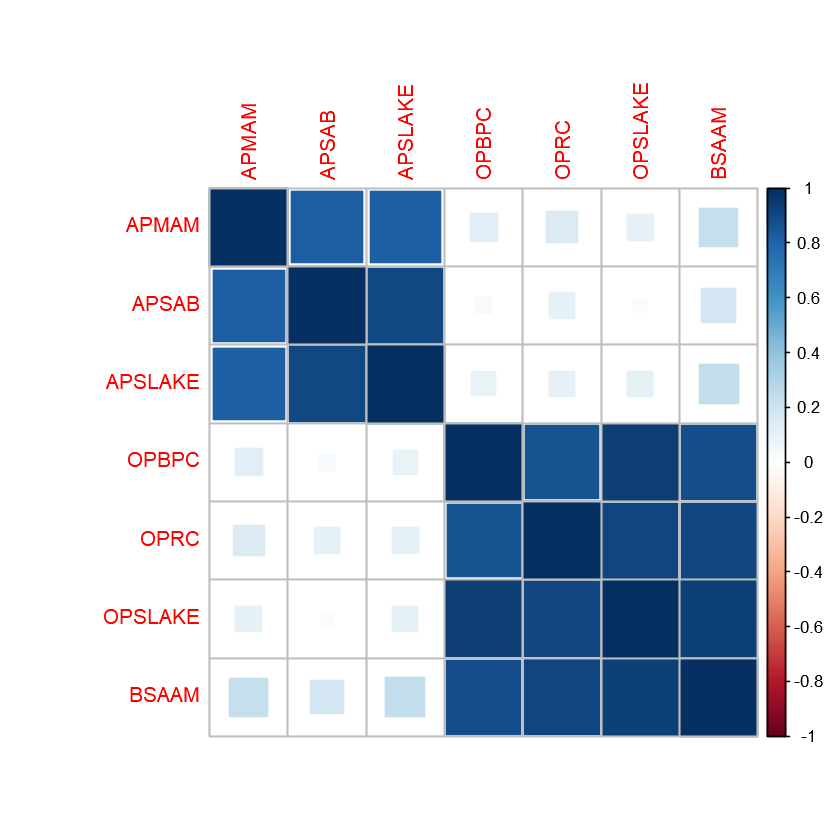

In [20]:
corrplot(calif.cor, method = 'square') # Plot the heatmap chart

> Can you spot positively correlated variates?. This might be a clear sign of collinearity

#### Feature Selection
>Since there are many features of which some are not statistically significant, we need to eliminate such features automatically.<br>
One such way would be to use STEPWISE SELECTION TECHIQUE. Let's look at the various stepwise methods as well as the issue associated with the process. 

> Forward stepwise selection:
starts with a model that has zero features. It then adds features one at a time until all the features are added and only the features statistically significant are kept.

> Backward stepwise selection: is the reverse of Forward stepwise selection.

> Drawbacks of stepwise selection
One of the main issues with stepwise regression is that it searches a large space of possible models. Hence it is prone to overfitting the data.<br>
One can perform both forward stepwise and backward stepwise on the same dataset and end up with two completely conflicting models.

#### Lets see how this selections are made for curiousity

In [60]:
# To perform forward selection we need to begin by specifying a starting model and the range
# of models which we want to examine in the search. 
# We will be using Aikake's Information Criterion (AIC), 
# the selection with the least AIC value will be picked.
no_features <- lm(BSAAM~1, data = calif.water)
no_features


Call:
lm(formula = BSAAM ~ 1, data = calif.water)

Coefficients:
(Intercept)  
      77756  


In [62]:
full_features <- lm(BSAAM ~., data= calif.water)
full_features
summary(full_features)


Call:
lm(formula = BSAAM ~ ., data = calif.water)

Coefficients:
(Intercept)        APMAM        APSAB      APSLAKE        OPBPC         OPRC  
   15944.67       -12.77      -664.41      2270.68        69.70      1916.45  
    OPSLAKE  
    2211.58  



Call:
lm(formula = BSAAM ~ ., data = calif.water)

Residuals:
   Min     1Q Median     3Q    Max 
-12690  -4936  -1424   4173  18542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15944.67    4099.80   3.889 0.000416 ***
APMAM         -12.77     708.89  -0.018 0.985725    
APSAB        -664.41    1522.89  -0.436 0.665237    
APSLAKE      2270.68    1341.29   1.693 0.099112 .  
OPBPC          69.70     461.69   0.151 0.880839    
OPRC         1916.45     641.36   2.988 0.005031 ** 
OPSLAKE      2211.58     752.69   2.938 0.005729 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7557 on 36 degrees of freedom
Multiple R-squared:  0.9248,	Adjusted R-squared:  0.9123 
F-statistic: 73.82 on 6 and 36 DF,  p-value: < 2.2e-16


In [63]:
# Run the forward selection process
# choose the features combination with the least AIC value
step(no_features, scope = list(lower = no_features, upper = full_features), direction = "forward")

Start:  AIC=873.65
BSAAM ~ 1

          Df  Sum of Sq        RSS    AIC
+ OPSLAKE  1 2.4087e+10 3.2640e+09 784.24
+ OPRC     1 2.3131e+10 4.2199e+09 795.28
+ OPBPC    1 2.1458e+10 5.8928e+09 809.64
+ APSLAKE  1 1.7004e+09 2.5651e+10 872.89
+ APMAM    1 1.5567e+09 2.5794e+10 873.13
<none>                  2.7351e+10 873.65
+ APSAB    1 9.1891e+08 2.6432e+10 874.18

Step:  AIC=784.24
BSAAM ~ OPSLAKE

          Df Sum of Sq        RSS    AIC
+ APSLAKE  1 663368666 2600641788 776.47
+ APSAB    1 661988129 2602022326 776.49
+ OPRC     1 574050696 2689959758 777.92
+ APMAM    1 524283532 2739726922 778.71
<none>                 3264010454 784.24
+ OPBPC    1     56424 3263954031 786.24

Step:  AIC=776.47
BSAAM ~ OPSLAKE + APSLAKE

        Df Sum of Sq        RSS    AIC
+ OPRC   1 531694203 2068947585 768.63
<none>               2600641788 776.47
+ APSAB  1  33349091 2567292697 777.91
+ APMAM  1  11041158 2589600630 778.28
+ OPBPC  1    122447 2600519341 778.46

Step:  AIC=768.63
BSAAM ~ OPSL


Call:
lm(formula = BSAAM ~ OPSLAKE + APSLAKE + OPRC, data = calif.water)

Coefficients:
(Intercept)      OPSLAKE      APSLAKE         OPRC  
      15425         2390         1712         1797  


In [64]:
# Run the backward selection process
# choose the features combination with the least AIC value
step(full_features, data = calif.water, direction = "backward")

Start:  AIC=774.36
BSAAM ~ APMAM + APSAB + APSLAKE + OPBPC + OPRC + OPSLAKE

          Df Sum of Sq        RSS    AIC
- APMAM    1     18537 2055849271 772.36
- OPBPC    1   1301629 2057132362 772.39
- APSAB    1  10869771 2066700504 772.58
<none>                 2055830733 774.36
- APSLAKE  1 163662571 2219493304 775.65
- OPSLAKE  1 493012936 2548843669 781.60
- OPRC     1 509894399 2565725132 781.89

Step:  AIC=772.36
BSAAM ~ APSAB + APSLAKE + OPBPC + OPRC + OPSLAKE

          Df Sum of Sq        RSS    AIC
- OPBPC    1   1284108 2057133378 770.39
- APSAB    1  12514566 2068363837 770.62
<none>                 2055849271 772.36
- APSLAKE  1 176735690 2232584961 773.90
- OPSLAKE  1 496370866 2552220136 779.66
- OPRC     1 511413723 2567262994 779.91

Step:  AIC=770.39
BSAAM ~ APSAB + APSLAKE + OPRC + OPSLAKE

          Df  Sum of Sq        RSS    AIC
- APSAB    1   11814207 2068947585 768.63
<none>                  2057133378 770.39
- APSLAKE  1  175480984 2232614362 771.91
- OPRC    


Call:
lm(formula = BSAAM ~ APSLAKE + OPRC + OPSLAKE, data = calif.water)

Coefficients:
(Intercept)      APSLAKE         OPRC      OPSLAKE  
      15425         1712         1797         2390  


In [65]:
# Both directions 
step(no_features, scope = list(upper = full_features), data = calif.water, direction="both")

Start:  AIC=873.65
BSAAM ~ 1

          Df  Sum of Sq        RSS    AIC
+ OPSLAKE  1 2.4087e+10 3.2640e+09 784.24
+ OPRC     1 2.3131e+10 4.2199e+09 795.28
+ OPBPC    1 2.1458e+10 5.8928e+09 809.64
+ APSLAKE  1 1.7004e+09 2.5651e+10 872.89
+ APMAM    1 1.5567e+09 2.5794e+10 873.13
<none>                  2.7351e+10 873.65
+ APSAB    1 9.1891e+08 2.6432e+10 874.18

Step:  AIC=784.24
BSAAM ~ OPSLAKE

          Df  Sum of Sq        RSS    AIC
+ APSLAKE  1 6.6337e+08 2.6006e+09 776.47
+ APSAB    1 6.6199e+08 2.6020e+09 776.49
+ OPRC     1 5.7405e+08 2.6900e+09 777.92
+ APMAM    1 5.2428e+08 2.7397e+09 778.71
<none>                  3.2640e+09 784.24
+ OPBPC    1 5.6424e+04 3.2640e+09 786.24
- OPSLAKE  1 2.4087e+10 2.7351e+10 873.65

Step:  AIC=776.47
BSAAM ~ OPSLAKE + APSLAKE

          Df  Sum of Sq        RSS    AIC
+ OPRC     1 5.3169e+08 2.0689e+09 768.63
<none>                  2.6006e+09 776.47
+ APSAB    1 3.3349e+07 2.5673e+09 777.91
+ APMAM    1 1.1041e+07 2.5896e+09 778.28
+ OPBP


Call:
lm(formula = BSAAM ~ OPSLAKE + APSLAKE + OPRC, data = calif.water)

Coefficients:
(Intercept)      OPSLAKE      APSLAKE         OPRC  
      15425         2390         1712         1797  


#### Results
> What did you observe from the models with the least AIC values?<br>
On this occassion all selection methods produced the same model giving us all clear to use.<br>
Let us now look at a more trust worthy technique

#### Fit The Multiple Regression

In [28]:
# fit our initial model
fit01 <- lm(BSAAM ~., data = calif.water)

In [29]:
# View the summary of the fitted model (i.e, fit01)
summary(fit01)


Call:
lm(formula = BSAAM ~ ., data = calif.water)

Residuals:
   Min     1Q Median     3Q    Max 
-12690  -4936  -1424   4173  18542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15944.67    4099.80   3.889 0.000416 ***
APMAM         -12.77     708.89  -0.018 0.985725    
APSAB        -664.41    1522.89  -0.436 0.665237    
APSLAKE      2270.68    1341.29   1.693 0.099112 .  
OPBPC          69.70     461.69   0.151 0.880839    
OPRC         1916.45     641.36   2.988 0.005031 ** 
OPSLAKE      2211.58     752.69   2.938 0.005729 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7557 on 36 degrees of freedom
Multiple R-squared:  0.9248,	Adjusted R-squared:  0.9123 
F-statistic: 73.82 on 6 and 36 DF,  p-value: < 2.2e-16


#### Output understanding

> OPBPC is not statistically significant or simply put, OPBPC adds NO VALUE OR nothing from a statistical standpoint

In [66]:
# We now apply the regsubsets() function from the leaps package to select the best models
subet.fit02 <- regsubsets(BSAAM ~ ., data = calif.water )

In [67]:
# Create a summary object 
best.subset.summary<- summary(subet.fit02)

In [68]:
# List all the functions in the summary object
names(best.subset.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [69]:
#The code tells us that the model with six features has the smallest RSS
which.min(best.subset.summary$rss)

[1] 6

> There are basiclly 4 statistical methods to aid in the selction of best features we will consider:<br> 
* Aikake's Information Criterion (AIC)<br> 
* Mallow's Cp (Cp)<br>  
* Bayesian Information Criterion (BIC)<br> 
* Adjusted R-squared<br>

With the first three, the goal is to ***minimize*** the value of the statistic while with adjusted R-squared, the goal is to ***maximize*** the statistic value.<br>
The purpose of these statistics is to create as ***parsimonious*** a model as possible, in other words, penalize model complexity.

> We will be looking at BIC values and Cp values to select the best subset. The reason being that In linear models, AIC and Cp are directly proportional to each other.BIC often select's models with fewer variables than Cp, so it will be good to plot these two charts side by side

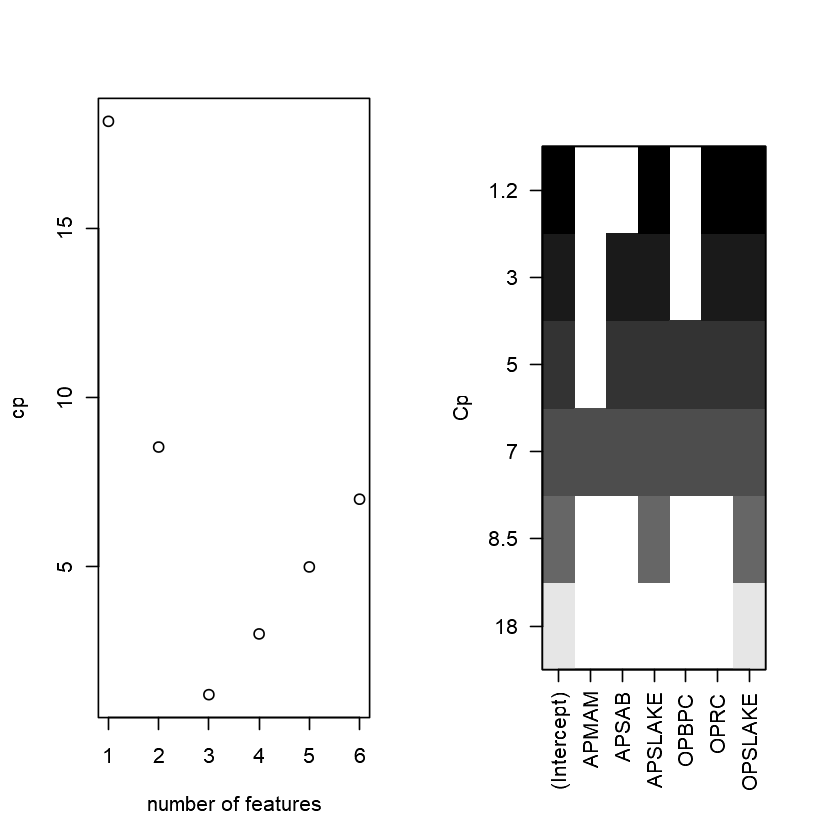

In [35]:
par(mfrow = c(1,2))   # This syntax defines the grid for plotting
plot(best.subset.summary$cp, xlab = "number of features", ylab = "cp")
plot(subet.fit02, scale = "Cp")

#### Interpretation of the chart above
> In the plot on the left-hand shows the model with three features has the least ***cp*** value (Remember, we look to minimize the cp value) while the plot on the right-hand shows the features that produced least cp values on your left-hand side plot.

> The way to read this plot is to select the lowest Cp value at the top of the y axis, which is 1.2. Then, move to the right and look at the colored blocks corresponding to the x axis. Doing this, we see that APSLAKE, OPRC, and OPSLAKE are the features included in this specific model.

In [37]:
which.min(best.subset.summary$bic)

which.max(best.subset.summary$adjr2)

[1] 3

[1] 3

In [38]:
#Since we have a better subset, we build our linear model again
good.subset.fit <- lm(BSAAM ~ APSLAKE + OPRC + OPSLAKE, data = calif.water)

In [37]:
summary(good.subset.fit)


Call:
lm(formula = BSAAM ~ APSLAKE + OPRC + OPSLAKE, data = calif.water)

Residuals:
   Min     1Q Median     3Q    Max 
-12964  -5140  -1252   4446  18649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15424.6     3638.4   4.239 0.000133 ***
APSLAKE       1712.5      500.5   3.421 0.001475 ** 
OPRC          1797.5      567.8   3.166 0.002998 ** 
OPSLAKE       2389.8      447.1   5.346 4.19e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7284 on 39 degrees of freedom
Multiple R-squared:  0.9244,	Adjusted R-squared:  0.9185 
F-statistic: 158.9 on 3 and 39 DF,  p-value: < 2.2e-16


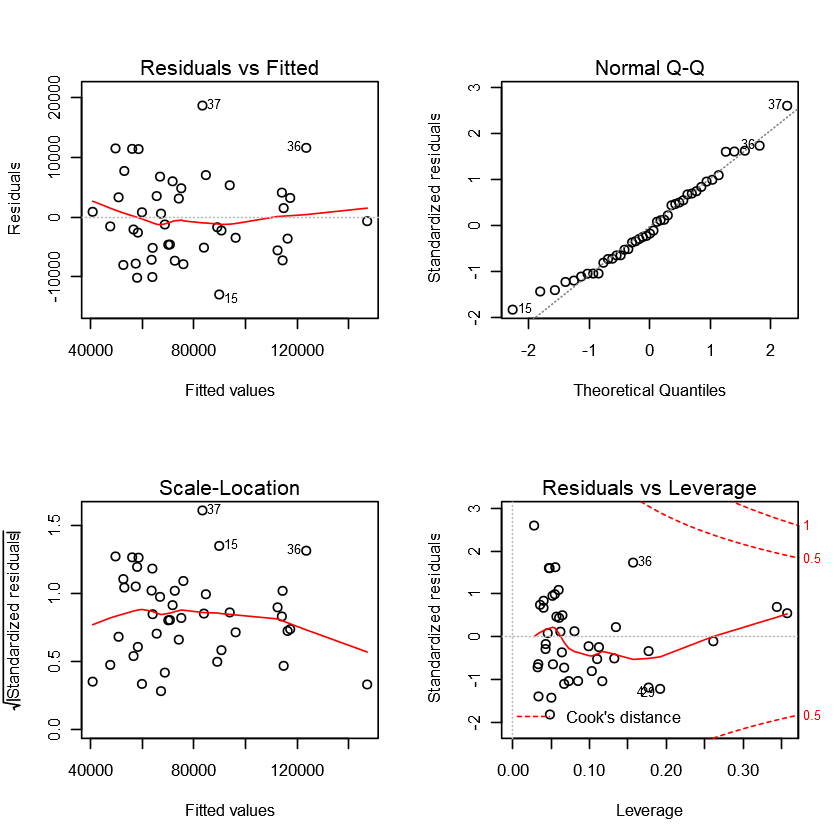

In [38]:
# Lets dig deeper with diagonostic plots
par(mfrow = c(2,2))
plot(good.subset.fit)

In [39]:
# Check for Heteroscedasticity (this is bad) what we actually want is a case of homoscedasticity
# if p > 0.05 Not Heteroscedasticity
lmtest::bptest(good.subset.fit)


	studentized Breusch-Pagan test

data:  good.subset.fit
BP = 1.2524, df = 3, p-value = 0.7405


In [40]:
# To investigate any issues of multi-collinearity
# we use Variance Inflation Factor (VIF)= 1/(1-R2)
# Minimum VIF = 1 mean no collinearity
# VIF > 5 means Collinearity exists
car::vif(good.subset.fit)

APSLAKE     OPRC  OPSLAKE 
1.011499 6.452569 6.444748

In [41]:
names(good.subset.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [43]:
# Check for normality of the residuals
# If the p-value > 0.05 it implying that the distribution of the data are not 
# significantly different from normal distribution.
# In other words, we can assume the normality.
shapiro.test(good.subset.fit$fitted.values)

# Since the p < 0.05, the conculde that the residual is not normaly distributed


	Shapiro-Wilk normality test

data:  good.subset.fit$fitted.values
W = 0.91788, p-value = 0.004572


> At this point we will have to remove either OPRC or OPSLAKE from the model since there seems to be collinearity and the
assumption of normality failed

In [10]:
# Lets remove OPSLAKE from the model, build and test for the assumptions again
good.fit03 <- lm(BSAAM ~ APSLAKE + OPSLAKE, data = calif.water)

ERROR: Error in is.data.frame(data): object 'calif.water' not found


In [18]:
#library(Boruta)
#feature_selection <- Boruta(BSAAM ~., data = calif.water, doTrace = 2, maxRuns = 500)

In [19]:
#plot(feature_selection, las=2)

In [45]:
summary(good.fit03)


Call:
lm(formula = BSAAM ~ APSLAKE + OPSLAKE, data = calif.water)

Residuals:
     Min       1Q   Median       3Q      Max 
-13335.8  -5893.2   -171.8   4219.5  19500.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19144.9     3812.0   5.022  1.1e-05 ***
APSLAKE       1768.8      553.7   3.194  0.00273 ** 
OPSLAKE       3689.5      196.0  18.829  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8063 on 40 degrees of freedom
Multiple R-squared:  0.9049,	Adjusted R-squared:  0.9002 
F-statistic: 190.3 on 2 and 40 DF,  p-value: < 2.2e-16


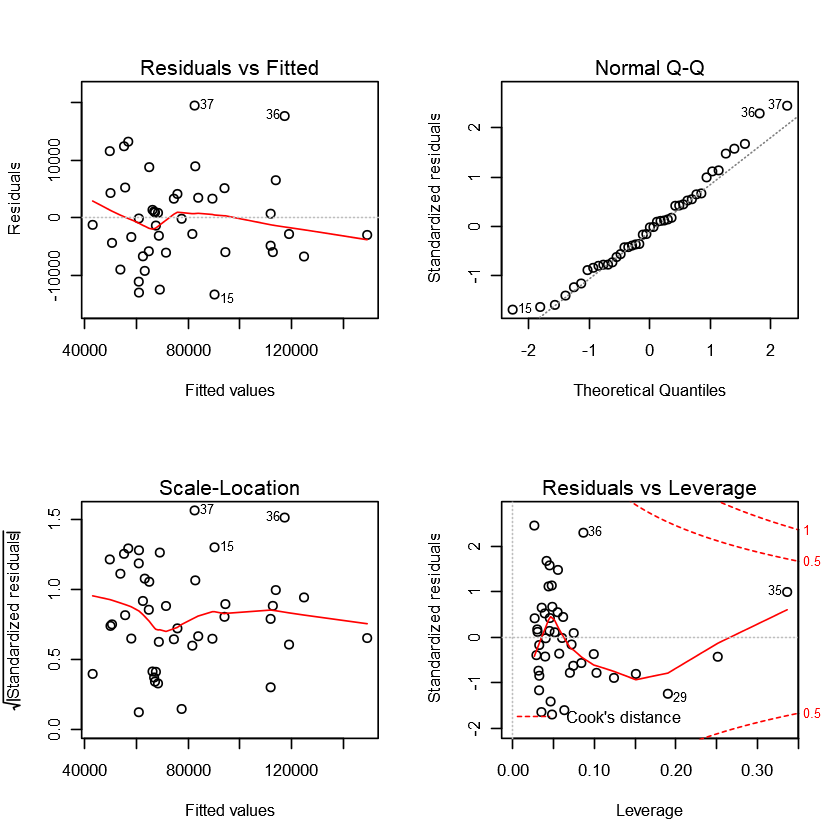

In [46]:
# Lets dig deeper with diagonostic plots
par(mfrow = c(2,2))
plot(good.fit03)